# Introduction to data visualisation

## Plotting graphs

In [1]:
# Import libraries 
import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used for loading CSV data

### Import data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")

### Data preparation

In [3]:
df.head() #Print the first 5 rows of data 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
title_day = df.groupby('day')[['total_bill','tip','size']].sum() #group and sum the data by the number of values for each ‘day’
print(title_day)

      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152


In [5]:
week_day = title_day.total_bill.sort_values().index #sort the indices and store them under the variable week_day
bill = title_day.total_bill.sort_values() #sort the rest of the data and store it under the variable bill

In [6]:
print(bill)

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


### Bar graph

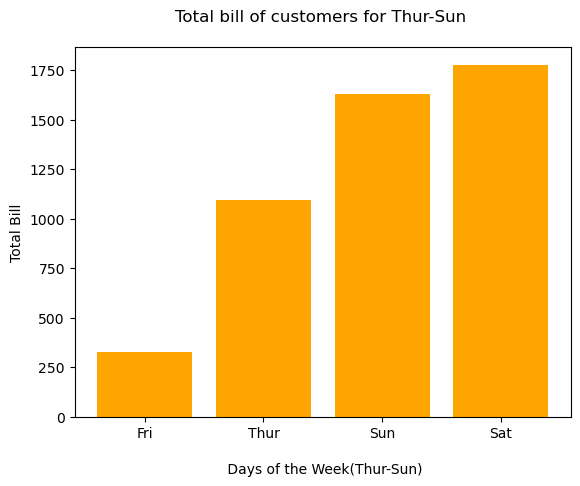

In [7]:
# Plot total bill (y-axis) per day of the week (x-axis). 
# We only have to call a single line of code from matplotlib to produce the base graph. 
# We set the x-axis, y-axis, and the colour of the bars.
plt.bar(week_day, bill, color= 'orange')

# Set x and y-axis titles.
plt.ylabel('Total Bill')
plt.xlabel('\n Days of the Week(Thur-Sun)') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title.
plt.title('Total bill of customers for Thur-Sun \n')

# Show graph.
plt.show()

### Pie chart

In [8]:
title_time = df.groupby('time')[['total_bill','tip','size']].sum() # Group and sum data by the number of values for each ‘time’ category
print(title_time)

        total_bill     tip  size
time                            
Dinner     3660.30  546.07   463
Lunch      1167.47  185.51   164


In [9]:
meal_time = title_time.tip.sort_values().index #Sort the indices 
tips = title_time.tip.sort_values() 

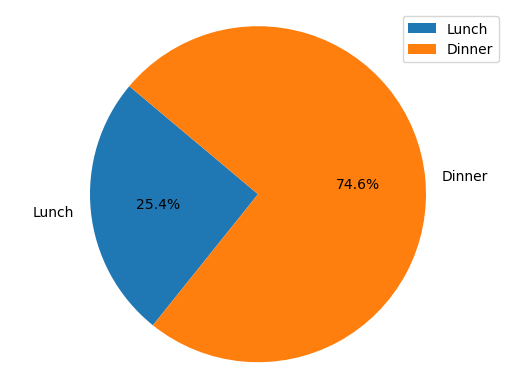

In [10]:
# Plot a pie chart.
# The `autopct` argument defines the format applied to the data labels. 
# The `startangle` argument determines which point in the pie to start plotting proportions from. 
# Full plot documentation can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html 
plt.pie(tips, labels = meal_time, autopct='%1.1f%%',  startangle=140)

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

### Pie vs donut charts

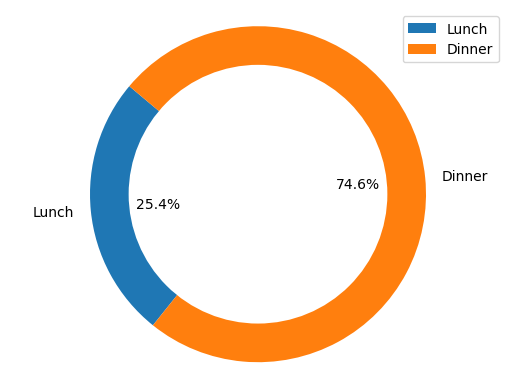

In [11]:
#Plot a donut chart

# Initially we create a pie chart as the base of our donut chart. 
plt.pie(tips, labels=meal_time, autopct='%1.1f%%', startangle=140)

# Next, we create a circle at the centre of the base plot.
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart.
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

### Line graph 

In [12]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}

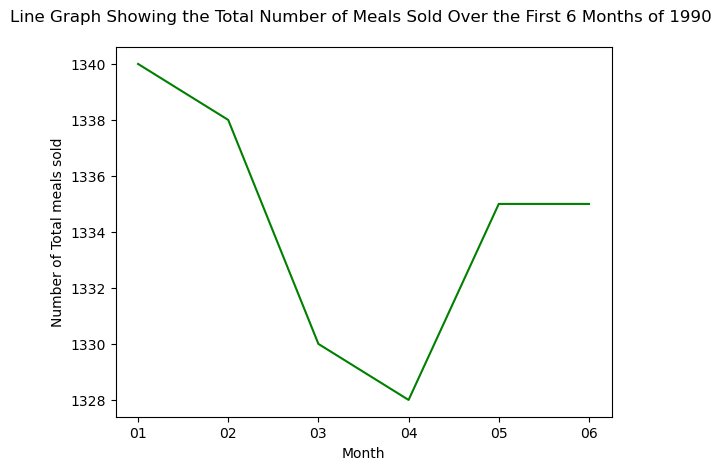

In [13]:
dates = list(total_meals.keys()) # Extract the dates (the dictionary keys of our data in this case)
x_ax = [date[3:5] for date in dates] # Extract the month from each date string
y_ax = list(total_meals.values()) # Extract the total number of meals consumed on each date as a Python list

# Plot the line graph.
plt.plot(x_ax, y_ax, color='green') 

# Set axis and graph titles.
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')

plt.show()

### Scatter plot

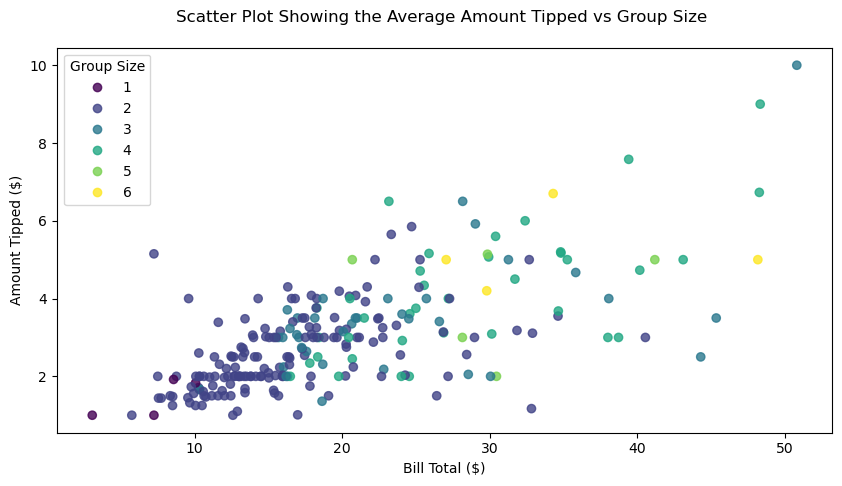

In [14]:
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the size of the plot. 
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatter plot, with the 'size' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(df['total_bill'], df['tip'], c=df['size'], alpha=0.8)

# We now create our legend based upon the underlying group size and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")

# Set graph and axis titles.
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')

plt.show()